# **Analysis of the Oceanographic Data**

This notebook is used to analyse the data obtained from the Drifters and the CDT Casting on the Day 2 of the 2022/2023 Sea Trip. The information obtained is also compared with information from Day 1 and Day 3, likewise, the information from intake 1 (i.e. 2021/2022).

### Importing Necessary Modules for the Notebook

In [1]:
# Python-based Libraries
import os
from datetime import timedelta, time
from math import sin, cos, sqrt, atan2, radians
import datetime as dt

# Data Analysis Libraries
import numpy as np
import pandas as pd

# Graph plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
try:
    import folium
except ModuleNotFoundError: # If folium library is not installed
    print("...Folium Library not found")
    !pip3 install folium
    print("...Folium Library installed")
    import folium

# Importing the Module for CTD Analysis
# try:
#     import ctd
# except ModuleNotFoundError: # If ctd library is not installed
#     print("...CTD Library not found")
#     !pip install ctd
#     import ctd
#     print("...CTD Library installed")

...Folium Library not found
...Folium Library installed


In [2]:
# !conda install pip

In [3]:
# !pip install ctd

In [4]:
# import ctd

### Connecting to Path

In [5]:
# Defining the path of the Group folder on Google Drive
path = "./"

# Check if the files are accessible
os.listdir(path)

['.git',
 '.ipynb_checkpoints',
 'CleanedDriftersData',
 'CTDData',
 'DriftersData',
 'Graphs',
 'LastYearData',
 'logsheet.xlsx',
 'OceanographyAnalysis.ipynb',
 'OtherDaysData',
 'README.md']

## Import Drifter Data



In [6]:
# Initializing a Dictionary datatype that stores data for each Drifter
data = {}

# Iterate through all file
for file in os.listdir(f"{path}/DriftersData"):

    # Data from the White Drifters are stored in ".csv" formats using "UTF-16 LE" Encoding
    if file.endswith(".csv"):
        
        data_key = file.split(".")[0][-4:] # Obtaining the name of the Drifter
        data_value = pd.read_csv(f'{path}/DriftersData/{file}', encoding="UTF-16 LE") #The encoding is very important.
        data[data_key] = data_value # Storing the data in the "data" dictionary
    
    # Data from the Yellow Drifters are stored in ".txt" formats using "UTF-8" Encoding
    elif file.endswith(".txt"):
        
        data_key = file.split(".")[0][-3:] # Obtaining the name of the Drifter
        data_value = pd.read_csv(f'{path}/DriftersData/{file}', encoding="UTF-8") #The encoding is very important.
        data[data_key] = data_value # Storing the data in the "data" dictionary

# Show the names of all drifters for which the data has been read
print(list(data.keys()))

['0119', '2052', '3368', '6439', '7230', '8436', '273', '274', '277']


### Import the Logsheet

In [7]:
log_df = pd.read_excel(f"{path}/logsheet.xlsx")

# Convert the Deployment Time and the Time of Recovery to datetime objects in Pandas
log_df['Deployment Time'] = pd.to_datetime(log_df['Deployment Time'],format= '%H:%M:%S' ).dt.time
log_df['Time of Recovery'] = pd.to_datetime(log_df['Time of Recovery'],format= '%H:%M:%S' ).dt.time

log_df.head(3)

,Station No,Type,Name,Deployment Time,Long Deg,Long Min,Long Dir,Lat Deg,Lat Min,Lat Dir,Time of Recovery,Long Deg.1,Log Min,Long Dir.1,Lat Deg.1,Lat Min.1,Lat Dir.1
0,1,Drifter,274.0,09:47:00,5,58.363,E,43,4.655,N,12:40:00,5.0,57.564,E,43.0,4.783,N
1,1,Drifter,8436.0,09:47:00,5,58.363,E,43,4.655,N,12:32:00,5.0,57.185,E,43.0,4.708,N
2,1,Drifter,6439.0,09:47:00,5,58.363,E,43,4.655,N,12:42:00,5.0,57.571,E,43.0,4.803,N


## **Data Cleaning**



### Converting the time from UTC to Paris Time

In [8]:
# Checking the data from the yellow drifters
data['273']

,Position time (UTC),Reception time (UTC),Latitude (°),Longitude (°),Speed (m/s),Course (°),Status,Battery (V),Temperature (°C)
0,2022-10-12 07:20:00,2022-10-12 07:20:21,43.10374,5.91212,4.16667,102.2,1,4.108,16.1
1,2022-10-12 07:30:00,2022-10-12 07:30:19,43.08793,5.92784,4.00278,85.9,1,4.107,16.9
2,2022-10-12 07:40:00,2022-10-12 07:40:26,43.08135,5.95918,4.58333,120.2,1,4.105,17.2
3,2022-10-12 07:50:00,2022-10-12 07:50:13,43.07754,5.97256,0.00000,290.2,1,4.104,17.6
4,2022-10-12 08:00:00,2022-10-12 08:00:20,43.07886,5.98378,0.59722,276.3,1,4.102,18.0
5,2022-10-12 08:10:00,2022-10-12 08:10:16,43.07883,5.98338,0.00000,269.1,1,4.103,20.7
6,2022-10-12 08:20:01,2022-10-12 08:20:12,43.07884,5.98265,0.00000,192.2,1,4.101,20.8
7,2022-10-12 08:30:01,2022-10-12 08:30:12,43.07894,5.98194,0.00000,333.1,1,4.100,20.8
8,2022-10-12 08:40:00,2022-10-12 08:40:26,43.07902,5.98133,0.00000,293.0,1,4.100,20.8
9,2022-10-12 08:50:00,2022-10-12 08:50:12,43.07904,5.98079,0.14444,79.2,1,4.099,20.9


In [9]:
# Converting the UTC time to Paris Time [For Yellow Drifters]

def DataClean_YDrifters(data_df):
    data_df['Position time (UTC)'] = pd.to_datetime(data_df['Position time (UTC)'])
    data_df['Reception time (UTC)'] = pd.to_datetime(data_df['Reception time (UTC)'])

    data_df['Position time'] = data_df['Position time (UTC)'] + timedelta(hours = 2)
    data_df['Reception time'] = data_df['Reception time (UTC)'] + timedelta(hours = 2)

    data_df = data_df.drop(labels=['Position time (UTC)', 'Reception time (UTC)', 'Course (°)', 'Reception time',
                                        'Status', 'Battery (V)'], axis=1)

    data_df = data_df.rename(columns={"Latitude (°)":"Latitude", "Longitude (°)":"Longitude", 
                      "Speed (m/s)":"Speed", "Temperature (°C)":"Temperature"}, inplace=False)
    
    data_df["Position time"] = data_df["Position time"].dt.time
    
    return data_df

In [10]:
# Checking the data from others
data['0119'].head(3)

,DeviceName,DeviceDateTime,BatteryStatus,CommId,Latitude,Longitude
0,0-4410119,2022-10-12 11:11:48,GOOD,0-4410119,43.08366,5.95759
1,0-4410119,2022-10-12 11:07:25,GOOD,0-4410119,43.08342,5.95843
2,0-4410119,2022-10-12 11:01:48,GOOD,0-4410119,43.08297,5.95946


In [11]:
data['0119'].dtypes

DeviceName         object
DeviceDateTime     object
BatteryStatus      object
CommId             object
Latitude          float64
Longitude         float64
dtype: object

In [12]:
# Converting the UTC time to Paris Time [For Other Drifters]

def DataClean_ODrifters(data_df):

    data_df['DeviceDateTime'] = pd.to_datetime(data_df['DeviceDateTime'])
    data_df['DeviceDateTime'] = data_df['DeviceDateTime'] + timedelta(hours = 2)

    data_df["Position time"] = pd.to_datetime(data_df["DeviceDateTime"]).dt.time
    
    data_df = data_df.drop(labels=['DeviceName', 'BatteryStatus', 'CommId', "DeviceDateTime"], axis=1)
    
    # Reversing the time to match Y drifter
    data_df_re = data_df[::-1].reset_index(drop = True) 
    
    return data_df_re

In [13]:
# Clean all data

for key in data.keys():
    if len(key) == 3:
        data[key] = DataClean_YDrifters(data[key])
    elif len(key) == 4:
        data[key] = DataClean_ODrifters(data[key])

In [14]:
data['277'].head(3)

,Latitude,Longitude,Speed,Temperature,Position time
0,43.10380,5.91181,3.96111,15.8,09:20:00
1,43.08799,5.92791,3.63611,16.8,09:30:00
2,43.08133,5.95918,4.63611,16.9,09:40:00


In [15]:
data["0119"].head(3)

,Latitude,Longitude,Position time
0,43.10520,5.88573,09:07:29
1,43.10477,5.88992,09:11:51
2,43.10506,5.90206,09:16:52


### Extracting Data from Deployment Time to Recovery Time

In [16]:
# Extract Data within the Deployment and Recovery time

def extractData(key, data, log_df):

    deploy_time = log_df["Deployment Time"][log_df["Name"] == float(key)]
    recov_time = log_df["Time of Recovery"][log_df["Name"] == float(key)]

    deploy_bool = np.array([(data[key]["Position time"][i] > deploy_time).to_numpy() for i in range(len(data[key]))]).flatten()
    recov_bool = np.array([(data[key]["Position time"][i] < recov_time).to_numpy() for i in range(len(data[key]))]).flatten()

    cleaning_bool = deploy_bool & recov_bool
    data[key] = data[key][cleaning_bool]
    data[key].reset_index(inplace = True)
    
    return data

In [17]:
for key in data.keys():
    data = extractData(key, data, log_df)
    
# All data has been cleaned and extracted at this point

In [18]:
data["0119"].tail(3)

,index,Latitude,Longitude,Position time
36,47,43.08297,5.95946,13:01:48
37,48,43.08342,5.95843,13:07:25
38,49,43.08366,5.95759,13:11:48


In [19]:
data["277"].head(3)

,index,Latitude,Longitude,Speed,Temperature,Position time
0,6,43.08001,5.99907,0.0,20.4,10:20:00
1,7,43.07988,5.99818,0.0,20.7,10:30:00
2,8,43.07974,5.99750,0.0,20.7,10:40:00


## **Analysis**

### Computing the Trajectory Velocity

To compute the velocity of the drifter from the latitude and longtitude, we used the spherical law of consine.

let's 

$\phi_1$ and $\phi_1$ be the latitude at point 1,2 

$\lambda_1$ and $\lambda_1$ be the longtitude at point 1,2 

$R$ is the radius of the earth

a is the haversine equation ref. https://en.wikipedia.org/wiki/Haversine_formula 

-------------------------------------------------------------------------------------------------------

$a = hav(\theta) = sin(\frac{\phi_2-\phi_1}{2})^2 + cos(\phi_1)cos(\phi_2)sin(\frac{\lambda_2-\lambda_1}{2})$

$c = 2atan2(\sqrt{a}, \sqrt{1-a})$

$velocity = \frac{Rc}{\Delta{T}}$

In [20]:
# approximate radius of earth in km
R = 6373.0


# create vectorize function to compute velocity
# #input time values in HH:MM:SS, time2 must be greater than time1 obviously
def calVelocity(data):
    # select columns for latitude, longtitude and time
    df_lat = np.array(data["Latitude"])
    df_long = np.array(data["Longitude"])
    df_time = data["Position time"]
    df_time = pd.to_datetime(df_time.astype(str), format='%H:%M:%S')
    
    # compute delta time
    d_time = np.array(df_time[1:]) - df_time[:-1]
    d_time = d_time.apply(lambda dt_i : dt_i.seconds/60.0)
    
    # compute distance from lat,long
    rad_lat = np.radians(df_lat)
    rad_long = np.radians(df_long)
    d_lat = rad_lat[1:] - np.array(rad_lat[:-1])
    d_long = rad_long[1:] - np.array(rad_long[:-1]) 
    
    a = np.sin(d_lat / 2.0)**2 + np.cos(rad_lat[:-1]) * np.cos(rad_lat[1:]) * np.sin(d_long / 2)**2
    c = 2.0 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c
    velocity = distance*1000.0/60.0/np.array(d_time, dtype=float)
    return pd.Series(np.append(0.0, velocity))

In [21]:
for key in data.keys():
    data[key]["velocity"] = calVelocity(data[key])
    data[key].drop("index", inplace = True, axis = 1) # Dropping unncessary index
    data [key] = data[key].iloc[1:] # Removing the first row (where v = 0)

In [22]:
data ['8436'].head(3)

,Latitude,Longitude,Position time,velocity
1,43.07685,5.97244,09:56:42,0.144393
2,43.07668,5.97191,10:01:41,0.157289
3,43.07680,5.97094,10:07:08,0.244439


### Exporting the Cleaned Data (with Velocities)

In [23]:
for key in data.keys():
    data[key].to_csv(f'{path}/CleanedDriftersData/{key}.csv')

# All the cleaned data has been exported to a folder for any necessary external use

### Visualizing the Trajectories and Velocities on Graph
By: Farooq and Maria

In [24]:
# rgb tuple to hexadecimal conversion
def rgb2hex(rgb):
    rgb = [hex(int(256*x)) for x in rgb]
    r, g, b = [str(x)[2:] for x in rgb]
    return f"#{r}{g}{b}"

In [25]:
# Determining the minimum and maximum velocities in the entire data

def extreme_velocities(data):
    min_vel = 50
    max_vel = 0

    for key in data.keys():
        min_value = np.min(data[key]["velocity"])
        max_value = np.max(data[key]["velocity"])

        min_vel = min_value if min_value < min_vel else min_vel
        max_vel = max_value if max_value > max_vel else max_vel


    return [min_vel, max_vel]

extreme_velocities(data)

[0.025626215489519835, 0.3405533501074622]

Plotting the Trajectories and Velocities for Each Drifter

In [26]:
# Function to obtain the centre of the graph for good plotting

def graph_centre(data):
    min_lat = 100
    max_lat = 0
    min_lon = 100
    max_lon = 0

    for key in data.keys():
        min_lat_val = np.min(data[key]["Latitude"])
        min_lon_val = np.min(data[key]["Longitude"])
        max_lat_val = np.max(data[key]["Latitude"])
        max_lon_val = np.max(data[key]["Longitude"])

        min_lat = min_lat_val if min_lat_val < min_lat else min_lat
        max_lat = max_lat_val if max_lat_val > max_lat else max_lat
        min_lon = min_lon_val if min_lon_val < min_lon else min_lon
        max_lon = max_lon_val if max_lon_val > max_lon else max_lon

    lat_centre = np.average([min_lat, max_lat])
    lon_centre= np.average([min_lon, max_lon])

    return lat_centre, lon_centre

graph_centre(data)

(43.082495, 5.97621)

In [27]:
np.average([2, 5])

3.5

In [28]:
# Initializing the Map
plot_map = folium.Map(location = graph_centre(data), zoom_start = 14.5, position="absolute", width='100%', height="100%", 
                      left='0%', top='0%', border=None, min_zoom=13, max_zoom=15)

# position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" allowfullscreen webkitallowfullscreen mozallowfullscreen

In [29]:
def plot_vel_traj(df_map, df, name):
    folium.Marker([ df["Latitude"][1], df["Longitude"][1] ],
              #popup = key,
              icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{f"{name}"}</div>""")
              ).add_to(df_map)
 
    folium.Marker([ df["Latitude"].iloc[-1], df["Longitude"].iloc[-1] ],
              #popup = folium.Popup(f'{key}', parse_html=True),
              icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{f"{name} end"}</div>""")
              ).add_to(df_map)

    color_mapper = cm.ScalarMappable(cmap=cm.OrRd)
    rgb_values = [c[:3] for c in color_mapper.to_rgba(df["velocity"])] # keep rgb and drop the "a" column
    colors = [rgb2hex(rgb) for rgb in rgb_values]

    start = False

    for lat, lon, vel, col in zip(df["Latitude"], df["Longitude"], df["velocity"], colors):
        if start:
            folium.PolyLine([[prev_lat, prev_long], [lat, lon]], color='white', weight=2
                            ).add_to(df_map)
        else:
            start = True

        prev_lat = lat
        prev_long = lon

        folium.CircleMarker(location=(lat,lon),radius=4, fill=True, fill_color=col, 
                            fill_opacity=0.7, stroke=False).add_to(df_map)

    return df_map

In [30]:
for key in data.keys():
    plot_map = plot_vel_traj(plot_map, data[key], key)

plot_map.save(f"{path}/Graphs/TrajAndVelocity.html")
plot_map

### Analysis of Drifter Types

The speeds can be compared using box plot.

In [86]:
data["277"]

,Latitude,Longitude,Speed,Temperature,Position time,velocity
1,43.07988,5.99818,0.0,20.7,10:30:00,0.122896
2,43.07974,5.99750,0.0,20.7,10:40:00,0.095663
3,43.07973,5.99668,0.0,20.8,10:50:00,0.111047
4,43.07993,5.99578,0.0,20.8,11:00:00,0.127379
5,43.08014,5.99489,0.0,20.8,11:10:00,0.126642
6,43.08039,5.99400,0.0,20.9,11:20:00,0.129114
7,43.08072,5.99307,0.0,20.9,11:30:00,0.139998
8,43.08119,5.99201,0.0,20.9,11:40:00,0.167903
9,43.08171,5.99098,0.0,20.9,11:50:00,0.169537
10,43.08229,5.98994,0.0,20.9,12:00:00,0.177172


dict_keys(['0119', '2052', '3368', '6439', '7230', '8436', '273', '274', '277'])


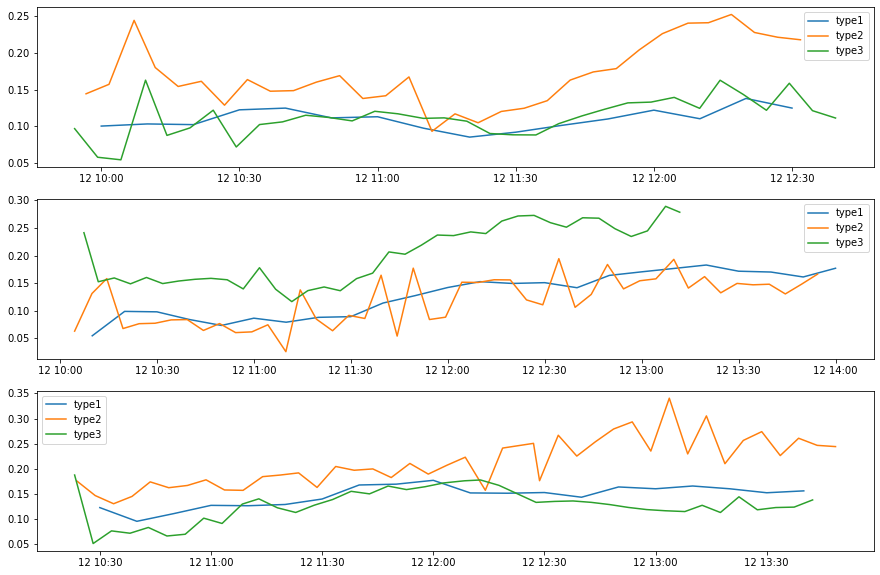

In [87]:
print(data.keys())
drift_type1 = ["274","273","277"]
drift_type2 = ["8436","7230","2052"]
drift_type3 = ["6439","0119","3368"]
date = dt.date(2022, 10, 12)

fig, ax = plt.subplots(3, 1, figsize=(15,10))
for i in range(3):
    date_time = [dt.datetime.combine(date, t) for t in data[drift_type1[i]]["Position time"]]
    ax[i].plot(date_time, data[drift_type1[i]]["velocity"])

    date_time = [dt.datetime.combine(date, t) for t in data[drift_type2[i]]["Position time"]]
    ax[i].plot(date_time, data[drift_type2[i]]["velocity"])

    date_time = [dt.datetime.combine(date, t) for t in data[drift_type3[i]]["Position time"]]
    ax[i].plot(date_time, data[drift_type3[i]]["velocity"])
    
    ax[i].legend(['type1','type2','type3'])

### Analysis of Circulation

### Analysis of the Daily Variability

#### Collection, Cleaning and Visualization of Day 1 Data

Collecting and Cleaning of Day 1 Data

In [35]:
# Importing the Logsheet

log1_df = pd.read_excel(f"{path}/OtherDaysData/Day1Logsheet.xlsx")

# Convert the Deployment Time and the Time of Recovery to datetime objects in Pandas
log1_df['Deployment Time'] = pd.to_datetime(log1_df['Deployment Time'],format= '%H:%M:%S' ).dt.time
log1_df['Time of Recovery'] = pd.to_datetime(log1_df['Time of Recovery'],format= '%H:%M:%S' ).dt.time

log1_df.head(3)

,Station,Name,Type,Deployment Time,Lon,Lat,Time of Recovery,Lon.1,Lat.1
0,1,273,Yellow 1m,10:28:00,5º 59.928',43º 4.8',14:05:00,5º 59.994,43º 5.342'
1,1,9666,White surface,10:28:00,5º 59.928',43º 4.8',14:13:00,6º 0.194',43º 5.617'
2,1,6439,White 60cm,10:28:00,5º 59.928',43º 4.8',14:10:00,5º 59.399',43º 5.403'


In [36]:
# Defining a function to clean and export all drifter data files in given drifter folder
def clean_drifters(drifter_folder:str, logsheet_df):
    # Initializing a Dictionary datatype that stores data for each Drifter
    data = {}

    # Iterate through all file
    for file in os.listdir(drifter_folder):

        # Data from the White Drifters are stored in ".csv" formats using "UTF-16 LE" Encoding
        if file.endswith(".csv"):
            data_key = file.split(".")[0][-4:] # Obtaining the name of the Drifter
            data_value = pd.read_csv(f'{drifter_folder}/{file}', encoding="UTF-16 LE") #The encoding is very important.
            # if len(data_key) == 3:
            #     data_value = pd.read_csv(f'{path}/Other Days Data/Day 1 Data/drifters/{file}', encoding="UTF-16BE") #The encoding is very important.
            # else:
            #     data_value = pd.read_csv(f'{path}/Other Days Data/Day 1 Data/drifters/{file}') #The encoding is very important.
            data[data_key] = data_value # Storing the data in the "data" dictionary

        # Data from the Yellow Drifters are stored in ".txt" formats using "UTF-8" Encoding
        elif file.endswith(".txt"):

            data_key = file.split(".")[0][-3:] # Obtaining the name of the Drifter
            data_value = pd.read_csv(f'{drifter_folder}/{file}', encoding="UTF-8") #The encoding is very important.
            data[data_key] = data_value # Storing the data in the "data" dictionary
        
    try:
        data.pop("0549")  # Exclude the drifter from further analysis because the data format is weird
    except KeyError: # Since the problem is only in Day 1 Data, it will excepted in Day 3.
        pass
    
    # Create Directory for Exporting CLeaned Data
    try:
        new_dir_path = f"{drifter_folder}/CleanedData"
        os.mkdir(new_dir_path, mode = 777)
    except FileExistsError:
        pass
     
    # Clean all data
    for key in data.keys():
        # To remove the unnecessary empty rows in Day 1 Data:
        data[key].dropna(inplace=True)
        
        # Reformat the Data
        if len(key) == 3:
            data[key] = DataClean_YDrifters(data[key])
        elif len(key) == 4:
            data[key] = DataClean_ODrifters(data[key])
        
        # Extracting the Data from the Deployment TIme to the Recovery Time
        data = extractData(key, data, logsheet_df)
        
        # Computing Trajectory Velocities
        data[key]["velocity"] = calVelocity(data[key])
        data[key].drop("index", inplace = True, axis = 1) # Dropping unncessary index
        data [key] = data[key].iloc[1:] # Removing the first row (where v = 0)
        
        # Export Data
        data[key].to_csv(f'{drifter_folder}/CleanedData/{key}.csv')

    return data

In [37]:
day1drifters = f"{path}/OtherDaysData/Day1Data/drifters"
data1 = clean_drifters(day1drifters, log1_df)

data1.keys()

UnicodeDecodeError: 'utf-16-le' codec can't decode byte 0x0a in position 0: truncated data

Visualization for Day 1

In [38]:
def visualize_drifters(data):
    
    # Initializing the Map
    data_map = folium.Map(location = graph_centre(data), zoom_start = 14.5, position="absolute", width='100%', height="100%", 
                      left='0%', top='0%', border=None, min_zoom=13, max_zoom=15)
    
    for key in data.keys():
        data_map = plot_vel_traj(data_map, data[key], key)
        
    return data_map

In [39]:
data1_copied = data1.copy() # To prevent the effect of the next command on the extracted data
data1_copied.pop("2052") # Removal of Drifter "2052" from the map due to "out-of-scope" values.

map_day1 = visualize_drifters(data1_copied)
map_day1.save(f"{path}/Graphs/TrajAndVelocity-Day1.html")
map_day1

NameError: name 'data1' is not defined

#### Collection, Cleaning and Visualization of Day 3 Data

Collecting and Cleaning of Day 3 Data

In [40]:
# Importing the Logsheet

log3_df = pd.read_excel(f"{path}/OtherDaysData/Day3Logsheet.xlsx")

# Convert the Deployment Time and the Time of Recovery to datetime objects in Pandas
log3_df['Deployment Time'] = pd.to_datetime(log3_df['Deployment Time'],format= '%H:%M:%S' ).dt.time
log3_df['Time of Recovery'] = pd.to_datetime(log3_df['Time of Recovery'],format= '%H:%M:%S' ).dt.time

log3_df.head(3)

,Station No,Name,Type,Deployment Time,Lon,Lat,Time of Recovery,Lon.1,Lat.1
0,1,3368,White w/o,09:54:00,005º59.972,"43º4,813",14:39:00,005º59.593,43º5.133
1,1,274,Yellow,09:54:00,005º59.972,"43º4,813",02:41:00,005º59.716,43º5.224
2,1,2052,White w/o,09:54:00,005º59.972,"43º4,813",14:45:00,006º0.041,43º5.421


In [41]:
day3drifters = f"{path}/OtherDaysData/Day3Data/drifters"
data3 = clean_drifters(day3drifters, log3_df)

data3.keys()

dict_keys(['0119', '2052', '3368', '6439', '7230', '8436', '9666', '273', '274', '279'])

In [42]:
data3["279"].head()

,Latitude,Longitude,Speed,Temperature,Position time,velocity
1,43.07712,5.98199,0.0,20.7,10:20:00,0.112831
2,43.07675,5.98137,0.0,20.8,10:30:00,0.108412
3,43.07641,5.98081,0.0,20.8,10:40:00,0.098606
4,43.07597,5.98009,0.0,20.8,10:50:00,0.127118
5,43.07558,5.97953,0.0,20.8,11:00:00,0.104774


Visualization for Day 3

In [43]:
data3_copied = data3.copy() # To prevent the effect of the next command on the extracted data
data3_copied.pop("9666") # Removal of Drifter "2052" from the map because it spans 2 days.
data3_copied.pop("274") # CHECK THE PROBLEM.

map_day3 = visualize_drifters(data3_copied)
map_day3.save(f"{path}/Graphs/TrajAndVelocity-Day3.html")
map_day3

#### Comparison Across the three Days.

## **CTD Data Analysis**

### Import and Clean the CTD Data
By Haleem and Aduragbemi

In [44]:
for file in os.listdir(f"{path}/CTD Data"):
    CTD_path=path+"CTD Data/"
    CTD_data = ctd.from_cnv(CTD_path+file)
    up,down = CTD_data.split()
    temperature = up['t090C']
    fig, ax = plt.subplots(figsize=(5.5, 6))
    temperature.plot_cast(ax=ax, label="unfiltered")
    temperature.remove_above_water()\
              .despike()\
              .lp_filter()\
              .press_check()\
              .interpolate(method='index',
                            limit_direction='both',
                            limit_area='inside')\
              .bindata(delta=1, method='interpolate')\
              .smooth(window_len=21, window='hanning') \
              .plot_cast(ax=ax,label="filtered")
    ax.legend(loc="lower right")
    ax.set_ylabel('Pressure (dbar)')
    ax.set_xlabel('Temperature (°C)')

FileNotFoundError: [WinError 3] The system cannot find the path specified: './/CTD Data'

In [45]:
for file in os.listdir(f"{path}/CTDData"):
    CTD_data = ctd.from_cnv(f'{path}/CTDData/{file}')
    up,down = CTD_data.split()
    fig, ax = plt.subplots(figsize=(5.5, 6))
    salinity=up["sal00"]
    salinity.plot_cast(ax=ax, label="unfiltered")
    salinity.remove_above_water()\
              .despike()\
              .lp_filter()\
              .press_check()\
              .interpolate(method='index',
                            limit_direction='both',
                            limit_area='inside')\
              .bindata(delta=1, method='interpolate')\
              .smooth(window_len=21, window='hanning') \
              .plot_cast(ax=ax,label="filtered")
    ax.legend(loc="lower right")
    ax.set_ylabel('Pressure (dbar)')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Pressure (dbar)')
    ax.set_xlabel('Salinity (g kg$^{-1}$)')

NameError: name 'ctd' is not defined

In [46]:
A = {1: {"Temp":10, "Pressure":15},
    2: {"Temp":20, "Pressure":25},
    3: {"Temp":30, "Pressure":35}}

A[1]['Temp']

10

### Plot the T-S Profile

### Compare the Outputs with 2021 Data